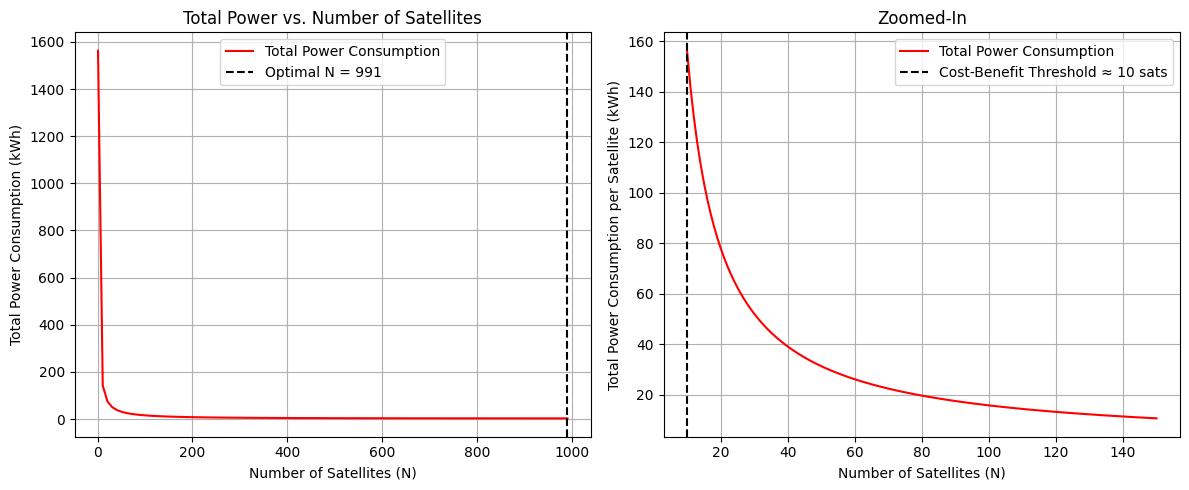

(np.int64(10), np.float64(156.2656))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Define constants
P_train = 1562.5  # kWh (Total power required for training one model on a single satellite using AI ASICs)
P_OISL = 0.000156  # kWh (Power per OISL transmission per update)
epochs = 10  # Number of federated learning rounds

# Define range of satellites
N_values = np.arange(1, 1001, 10)  # Full range from 1 to 1000 satellites

# Compute total power consumption using P_FL(N) = P_train / N + N * P_OISL * epochs
P_FL_values = (P_train / N_values) + (N_values * P_OISL * epochs)

# Find the optimal number of satellites (minimum power consumption)
optimal_N = N_values[np.argmin(P_FL_values)]
optimal_P_FL = np.min(P_FL_values)

# Define zoomed-in range for cost-benefit analysis (10 to 150 satellites)
zoomed_N_values = np.arange(10, 151, 1)
zoomed_P_FL_values = (P_train / zoomed_N_values) + (zoomed_N_values * P_OISL * epochs)

# Compute percentage decrease in power per additional satellite
percentage_deltas = np.abs(np.diff(zoomed_P_FL_values) / zoomed_P_FL_values[:-1])

# Find the cost-benefit threshold where power savings diminish (<0.5% per satellite)
cost_benefit_N = zoomed_N_values[np.argmax(percentage_deltas < 0.005)]

# Plot Full Power Consumption Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # First subplot (Full Range)
plt.plot(N_values, P_FL_values, label="Total Power Consumption", color='r')
plt.axvline(x=optimal_N, color='black', linestyle='--', label=f'Optimal N = {optimal_N}')
plt.xlabel("Number of Satellites (N)")
plt.ylabel("Total Power Consumption (kWh)")
plt.title("Total Power vs. Number of Satellites")
plt.legend()
plt.grid(True)

# Key takeaway from plot 1:
# As more satellites participate, total power required drops exponentially at first 
# because training power is inversely proportional to the number of satellites. 
# OISL communication costs start to balance out training power savings as N increases. 
# Adding more satellites still saves power, but the gains diminish. 
# This is where power consumption is at its absolute lowest. 
# However, getting here requires adding a lot more satellites, which increases costs.

# Plot Zoomed-In Gain Analysis
plt.subplot(1, 2, 2)  
plt.plot(zoomed_N_values, zoomed_P_FL_values, label="Total Power Consumption", color='r')
plt.axvline(x=cost_benefit_N, color='black', linestyle='--', label=f'Cost-Benefit Threshold ≈ {cost_benefit_N} sats')
plt.xlabel("Number of Satellites (N)")
plt.ylabel("Total Power Consumption per Satellite (kWh)")
plt.title("Zoomed-In")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Display results
cost_benefit_N, zoomed_P_FL_values[np.where(zoomed_N_values == cost_benefit_N)][0]

